In [2]:
## AE Activation Experiment Notebook
# 1. Connect to Drive
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/projects/ae-vae-anomaly-detection/data/processed/cleaned.csv'

Mounted at /content/drive


In [3]:
# 2. Load Processed Data
import pandas as pd

#load cleaned data
cleaned_df = pd.read_csv(data_path)
print(f'Loaded cleaned data: {cleaned_df.shape[0]} rows, {cleaned_df.shape[1]} columns')

# get a small sample for training model
df = cleaned_df.sample(frac=0.1, random_state=42)
print(f'Sampled data: {df.shape[0]} rows, {df.shape[1]} columns')

Loaded cleaned data: 640788 rows, 178 columns
Sampled data: 64079 rows, 178 columns


In [4]:
# 3. Train/Test Split
from sklearn.model_selection import train_test_split

# Separate features and label
X = df.drop(columns='label')
y = df['label']

# First split off a mixed test set (normal+anomaly), stratified to keep the same
#    anomaly ratio in train and test.
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# From the remaining (X_temp / y_temp) we only train on the normal samples:
#    i.e. drop the anomalies from this “train+val pool”
X_train_val = X_temp[y_temp == 0]

# Finally split that normal‐only pool into X_train / X_val
X_train, X_val = train_test_split(
    X_train_val,
    test_size=0.2,
    random_state=42
)

# Now:
#  - X_train, X_val are both *only* normal samples (for AE/VAE training & early stopping)
#  - X_test / y_test is your held‐out mixed set (with both normal and anomalous),
#    and it never overlaps with X_train or X_val

In [1]:
!mkdir -p /content/src/models

In [18]:
import sys
sys.path.append('/content/src')
from models.ae_model import build_ae, train_autoencoder, plot_training_history
from models.ae_evaluation import evaluate_anomaly_detection, visualize_reconstruction, compute_reconstruction_error

In [25]:
from src.models.ae_model import build_ae
from importlib import reload
import src.models.ae_model as ae_model
reload(ae_model)

<module 'src.models.ae_model' from '/content/src/models/ae_model.py'>


Training Shallow AE with activation: relu
Epoch 1/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1642 - mae: 0.2516

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.1636 - mae: 0.2508 - val_loss: 0.0026 - val_mae: 0.0151 - learning_rate: 0.0010
Epoch 2/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - mae: 0.0254

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0041 - mae: 0.0253 - val_loss: 0.0019 - val_mae: 0.0092 - learning_rate: 0.0010
Epoch 3/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - mae: 0.0133

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0030 - mae: 0.0133 - val_loss: 0.0018 - val_mae: 0.0088 - learning_rate: 0.0010
Epoch 4/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mae: 0.0125

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0027 - mae: 0.0125 - val_loss: 0.0016 - val_mae: 0.0084 - learning_rate: 0.0010
Epoch 5/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 - mae: 0.0122

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0026 - mae: 0.0122 - val_loss: 0.0015 - val_mae: 0.0080 - learning_rate: 0.0010
Epoch 6/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0023 - mae: 0.0118

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0023 - mae: 0.0118 - val_loss: 0.0014 - val_mae: 0.0080 - learning_rate: 0.0010
Epoch 7/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 - mae: 0.0116

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0022 - mae: 0.0116 - val_loss: 0.0013 - val_mae: 0.0075 - learning_rate: 0.0010
Epoch 8/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 - mae: 0.0113

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0021 - mae: 0.0113 - val_loss: 0.0011 - val_mae: 0.0071 - learning_rate: 0.0010
Epoch 9/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - mae: 0.0111

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0020 - mae: 0.0111 - val_loss: 0.0010 - val_mae: 0.0068 - learning_rate: 0.0010
Epoch 10/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - mae: 0.0107

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0018 - mae: 0.0107 - val_loss: 9.3360e-04 - val_mae: 0.0064 - learning_rate: 0.0010
Epoch 11/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - mae: 0.0106

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0018 - mae: 0.0106 - val_loss: 8.7641e-04 - val_mae: 0.0063 - learning_rate: 0.0010
Epoch 12/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - mae: 0.0103

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0017 - mae: 0.0103 - val_loss: 8.6501e-04 - val_mae: 0.0064 - learning_rate: 0.0010
Epoch 13/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - mae: 0.0102

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0016 - mae: 0.0102 - val_loss: 7.7308e-04 - val_mae: 0.0061 - learning_rate: 0.0010
Epoch 14/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015 - mae: 0.0101

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0015 - mae: 0.0101 - val_loss: 7.2139e-04 - val_mae: 0.0061 - learning_rate: 0.0010
Epoch 15/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - mae: 0.0099

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0014 - mae: 0.0099 - val_loss: 6.3739e-04 - val_mae: 0.0058 - learning_rate: 0.0010
Epoch 16/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - mae: 0.0097

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0013 - mae: 0.0097 - val_loss: 5.9109e-04 - val_mae: 0.0055 - learning_rate: 0.0010
Epoch 17/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - mae: 0.0096

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0013 - mae: 0.0096 - val_loss: 5.7611e-04 - val_mae: 0.0057 - learning_rate: 0.0010
Epoch 18/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - mae: 0.0098

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0013 - mae: 0.0098 - val_loss: 5.3641e-04 - val_mae: 0.0053 - learning_rate: 0.0010
Epoch 19/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - mae: 0.0095

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0013 - mae: 0.0095 - val_loss: 5.2892e-04 - val_mae: 0.0052 - learning_rate: 0.0010
Epoch 20/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0094

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0012 - mae: 0.0094 - val_loss: 5.0463e-04 - val_mae: 0.0050 - learning_rate: 0.0010
Epoch 21/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0093
Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0093 - val_loss: 5.0882e-04 - val_mae: 0.0051 - learning_rate: 0.0010
Epoch 22/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0091

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0091 - val_loss: 4.9115e-04 - val_mae: 0.0047 - learning_rate: 5.0000e-04
Epoch 23/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0090

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.8495e-04 - val_mae: 0.0047 - learning_rate: 5.0000e-04
Epoch 24/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0090
Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.8587e-04 - val_mae: 0.0047 - learning_rate: 5.0000e-04
Epoch 25/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.7104e-04 - val_mae: 0.0045 - learning_rate: 2.5000e-04
Epoch 26/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 4.6192e-04 - val_mae: 0.0044 - learning_rate: 2.5000e-04
Epoch 27/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0088
Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.6457e-04 - val_mae: 0.0045 - learning_rate: 2.5000e-04
Epoch 28/100
617/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 4.6138e-04 - val_mae: 0.0044 - learning_rate: 1.2500e-04
Epoch 29/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0088

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.5701e-04 - val_mae: 0.0044 - learning_rate: 1.2500e-04
Epoch 30/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mae: 0.0088


Epoch 30: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.5439e-04 - val_mae: 0.0043 - learning_rate: 1.2500e-04
Epoch 31/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0088

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.5192e-04 - val_mae: 0.0043 - learning_rate: 6.2500e-05
Epoch 32/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.5241e-04 - val_mae: 0.0043 - learning_rate: 6.2500e-05
Epoch 33/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mae: 0.0088
Epoch 33: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.5224e-04 - val_mae: 0.0043 - learning_rate: 6.2500e-05
Epoch 34/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0088

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.5070e-04 - val_mae: 0.0043 - learning_rate: 3.1250e-05
Epoch 35/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.5148e-04 - val_mae: 0.0043 - learning_rate: 3.1250e-05
Epoch 36/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0087
Epoch 36: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.5143e-04 - val_mae: 0.0043 - learning_rate: 3.1250e-05
Epoch 37/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.5102e-04 - val_mae: 0.0043 - learning_rate: 1.5625e-05
Epoch 38/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0087

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.4900e-04 - val_mae: 0.0043 - learning_rate: 1.5625e-05
Epoch 39/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0088


Epoch 39: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.4787e-04 - val_mae: 0.0043 - learning_rate: 1.5625e-05
Epoch 40/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.4791e-04 - val_mae: 0.0043 - learning_rate: 7.8125e-06
Epoch 41/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0087

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.4725e-04 - val_mae: 0.0043 - learning_rate: 7.8125e-06
Epoch 42/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0087
Epoch 42: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.5138e-04 - val_mae: 0.0043 - learning_rate: 7.8125e-06
Epoch 43/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.5048e-04 - val_mae: 0.0043 - learning_rate: 3.9063e-06
Epoch 44/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 4.4907e-04 - val_mae: 0.0043 - learning_rate: 3.9063e-06
Epoch 45/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0088
Epoch 45: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.4977e-04 - va

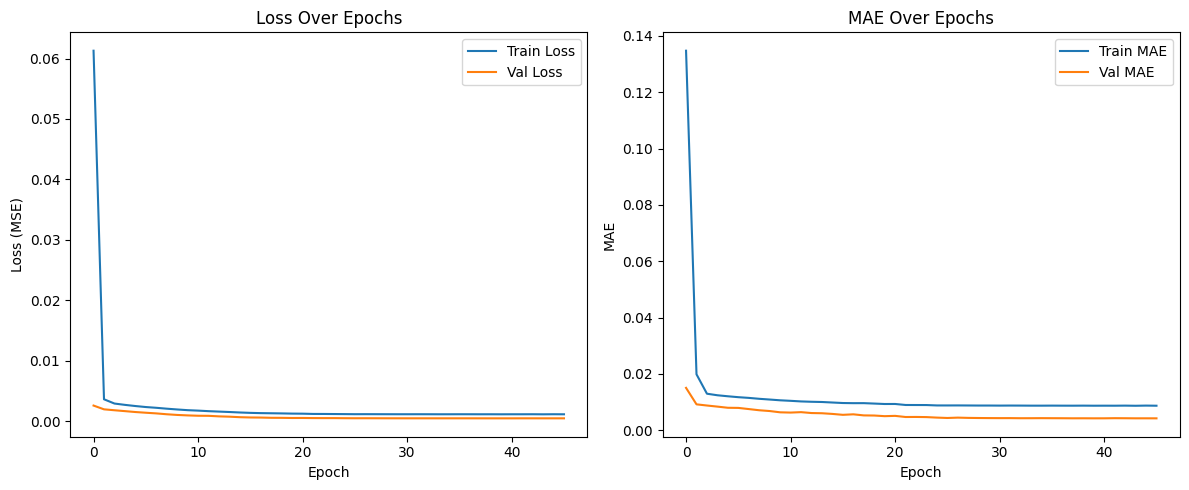

✅ Training plot saved as: training_relu.png

Evaluation for activation: relu
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


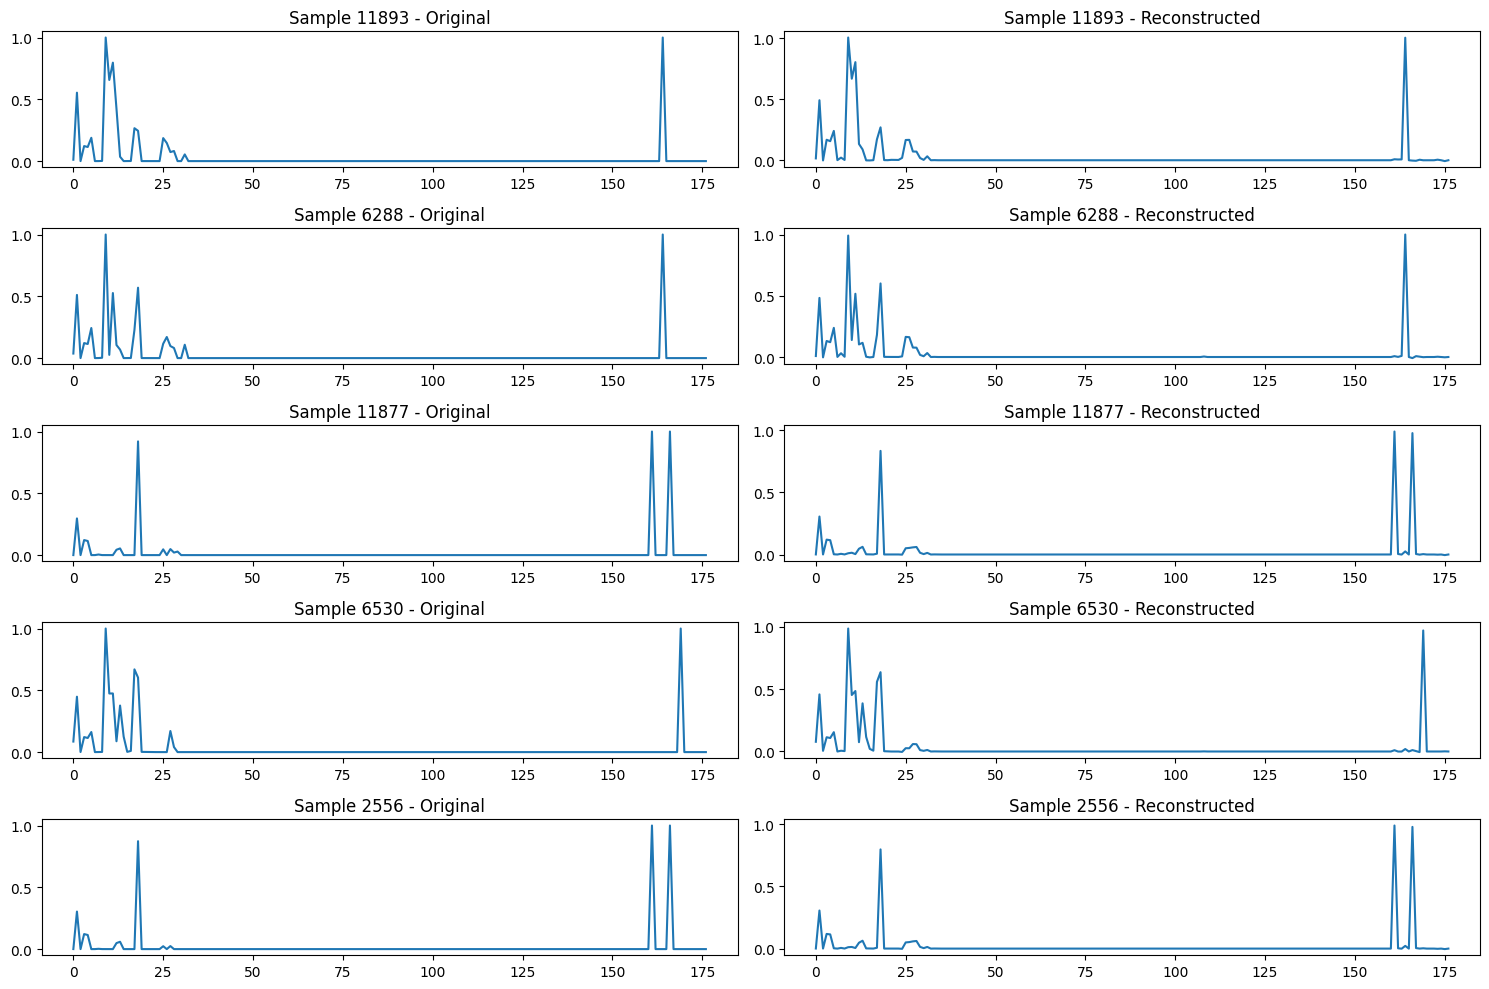


Training Shallow AE with activation: tanh
Epoch 1/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1364 - mae: 0.2489

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.1352 - mae: 0.2474 - val_loss: 0.0036 - val_mae: 0.0158 - learning_rate: 0.0010
Epoch 2/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - mae: 0.0291

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0047 - mae: 0.0291 - val_loss: 0.0025 - val_mae: 0.0112 - learning_rate: 0.0010
Epoch 3/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mae: 0.0140

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0031 - mae: 0.0140 - val_loss: 0.0020 - val_mae: 0.0094 - learning_rate: 0.0010
Epoch 4/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 - mae: 0.0126

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0026 - mae: 0.0126 - val_loss: 0.0016 - val_mae: 0.0085 - learning_rate: 0.0010
Epoch 5/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mae: 0.0119

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0023 - mae: 0.0119 - val_loss: 0.0013 - val_mae: 0.0079 - learning_rate: 0.0010
Epoch 6/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mae: 0.0115

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0020 - mae: 0.0115 - val_loss: 0.0011 - val_mae: 0.0075 - learning_rate: 0.0010
Epoch 7/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - mae: 0.0110

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0018 - mae: 0.0110 - val_loss: 9.7358e-04 - val_mae: 0.0068 - learning_rate: 0.0010
Epoch 8/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - mae: 0.0107

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0017 - mae: 0.0107 - val_loss: 8.6424e-04 - val_mae: 0.0064 - learning_rate: 0.0010
Epoch 9/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - mae: 0.0103

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0016 - mae: 0.0103 - val_loss: 7.9138e-04 - val_mae: 0.0059 - learning_rate: 0.0010
Epoch 10/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015 - mae: 0.0101

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0015 - mae: 0.0101 - val_loss: 7.4977e-04 - val_mae: 0.0061 - learning_rate: 0.0010
Epoch 11/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - mae: 0.0100

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0014 - mae: 0.0100 - val_loss: 7.3866e-04 - val_mae: 0.0058 - learning_rate: 0.0010
Epoch 12/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - mae: 0.0098

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0014 - mae: 0.0098 - val_loss: 6.9804e-04 - val_mae: 0.0056 - learning_rate: 0.0010
Epoch 13/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - mae: 0.0096

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0013 - mae: 0.0096 - val_loss: 6.3311e-04 - val_mae: 0.0058 - learning_rate: 0.0010
Epoch 14/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - mae: 0.0096

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0013 - mae: 0.0096 - val_loss: 5.4484e-04 - val_mae: 0.0054 - learning_rate: 0.0010
Epoch 15/100
617/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0095

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0095 - val_loss: 5.3214e-04 - val_mae: 0.0055 - learning_rate: 0.0010
Epoch 16/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0094

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0012 - mae: 0.0094 - val_loss: 5.1192e-04 - val_mae: 0.0053 - learning_rate: 0.0010
Epoch 17/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0094 - val_loss: 5.1688e-04 - val_mae: 0.0052 - learning_rate: 0.0010
Epoch 18/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0093


Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0012 - mae: 0.0093 - val_loss: 4.7608e-04 - val_mae: 0.0050 - learning_rate: 0.0010
Epoch 19/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 4.4325e-04 - val_mae: 0.0046 - learning_rate: 5.0000e-04
Epoch 20/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 4.3504e-04 - val_mae: 0.0046 - learning_rate: 5.0000e-04
Epoch 21/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 4.2616e-04 - val_mae: 0.0046 - learning_rate: 5.0000e-04
Epoch 22/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 4.3180e-04 - val_mae: 0.0047 - learning_rate: 5.0000e-04
Epoch 23/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.2830e-04 - val_mae: 0.0046 - learning_rate: 5.0000e-04
Epoch 24/100
617/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0088


Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.2152e-04 - val_mae: 0.0045 - learning_rate: 5.0000e-04
Epoch 25/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0086

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0010 - mae: 0.0086 - val_loss: 4.0599e-04 - val_mae: 0.0043 - learning_rate: 2.5000e-04
Epoch 26/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0086

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0011 - mae: 0.0086 - val_loss: 4.0149e-04 - val_mae: 0.0042 - learning_rate: 2.5000e-04
Epoch 27/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0086
Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0011 - mae: 0.0086 - val_loss: 4.0216e-04 - val_mae: 0.0041 - learning_rate: 2.5000e-04
Epoch 28/100
617/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0084

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.9345e-04 - val_mae: 0.0042 - learning_rate: 1.2500e-04
Epoch 29/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010 - mae: 0.0085

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 3.9010e-04 - val_mae: 0.0041 - learning_rate: 1.2500e-04
Epoch 30/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0085
Epoch 30: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 3.9064e-04 - val_mae: 0.0041 - learning_rate: 1.2500e-04
Epoch 31/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0085

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 3.8772e-04 - val_mae: 0.0040 - learning_rate: 6.2500e-05
Epoch 32/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010 - mae: 0.0085

627/627 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 3.8462e-04 - val_mae: 0.0040 - learning_rate: 6.2500e-05
Epoch 33/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0084


Epoch 33: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.8461e-04 - val_mae: 0.0040 - learning_rate: 6.2500e-05
Epoch 34/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.8497e-04 - val_mae: 0.0040 - learning_rate: 3.1250e-05
Epoch 35/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0084

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.8439e-04 - val_mae: 0.0040 - learning_rate: 3.1250e-05
Epoch 36/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - mae: 0.0084


Epoch 36: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.8345e-04 - val_mae: 0.0040 - learning_rate: 3.1250e-05
Epoch 37/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 3.8400e-04 - val_mae: 0.0040 - learning_rate: 1.5625e-05
Epoch 38/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0085

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 3.8286e-04 - val_mae: 0.0040 - learning_rate: 1.5625e-05
Epoch 39/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010 - mae: 0.0084


Epoch 39: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.8174e-04 - val_mae: 0.0040 - learning_rate: 1.5625e-05
Epoch 40/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.8419e-04 - val_mae: 0.0040 - learning_rate: 7.8125e-06
Epoch 41/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.8263e-04 - val_mae: 0.0040 - learning_rate: 7.8125e-06
Epoch 42/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010 - mae: 0.0084
Epoch 42: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.8221e-04 - val_mae: 0.0040 - learning_rate: 7.8125e-06
Epoch 43/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.8368e-04 - val_mae: 0.0040 - learning_rate: 3.9063e-06
Epoch 44/100
620/627 ━━━━━━━

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.8073e-04 - val_mae: 0.0040 - learning_rate: 3.9063e-06
Epoch 45/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0085
Epoch 45: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 3.8290e-04 - val_mae: 0.0040 - learning_rate: 3.9063e-06
Epoch 46/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.8476e-04 - val_mae: 0.0040 - learning_rate: 1.9531e-06
Epoch 47/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.8166e-04 - val_mae: 0.0040 - learning_rate: 1.9531e-06
Epoch 48/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0085
Epoch 48: ReduceLROnPlateau reducing learning rate to 1e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 3.8393e-04 - val_mae: 0.0040 - 

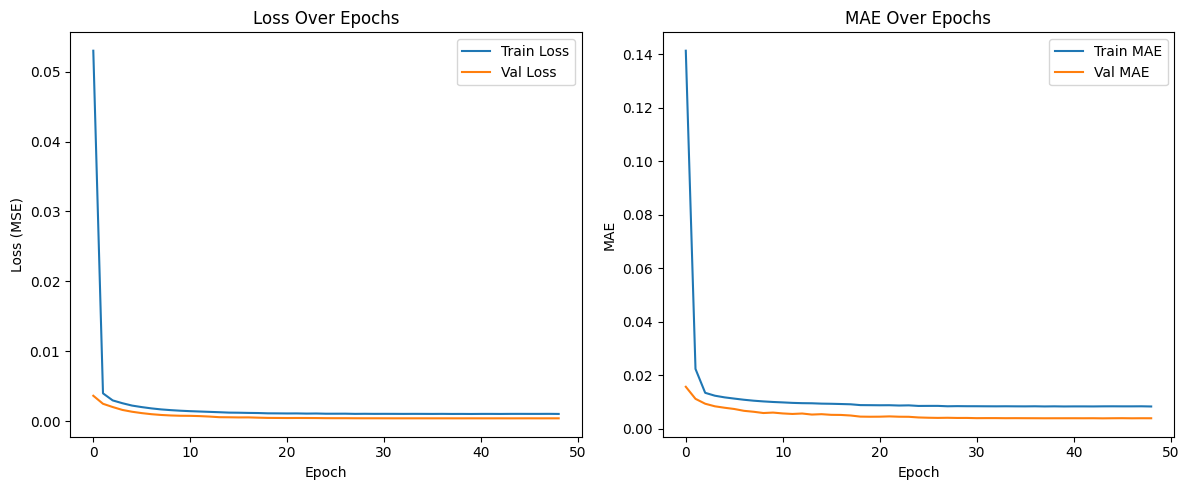

✅ Training plot saved as: training_tanh.png

Evaluation for activation: tanh
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


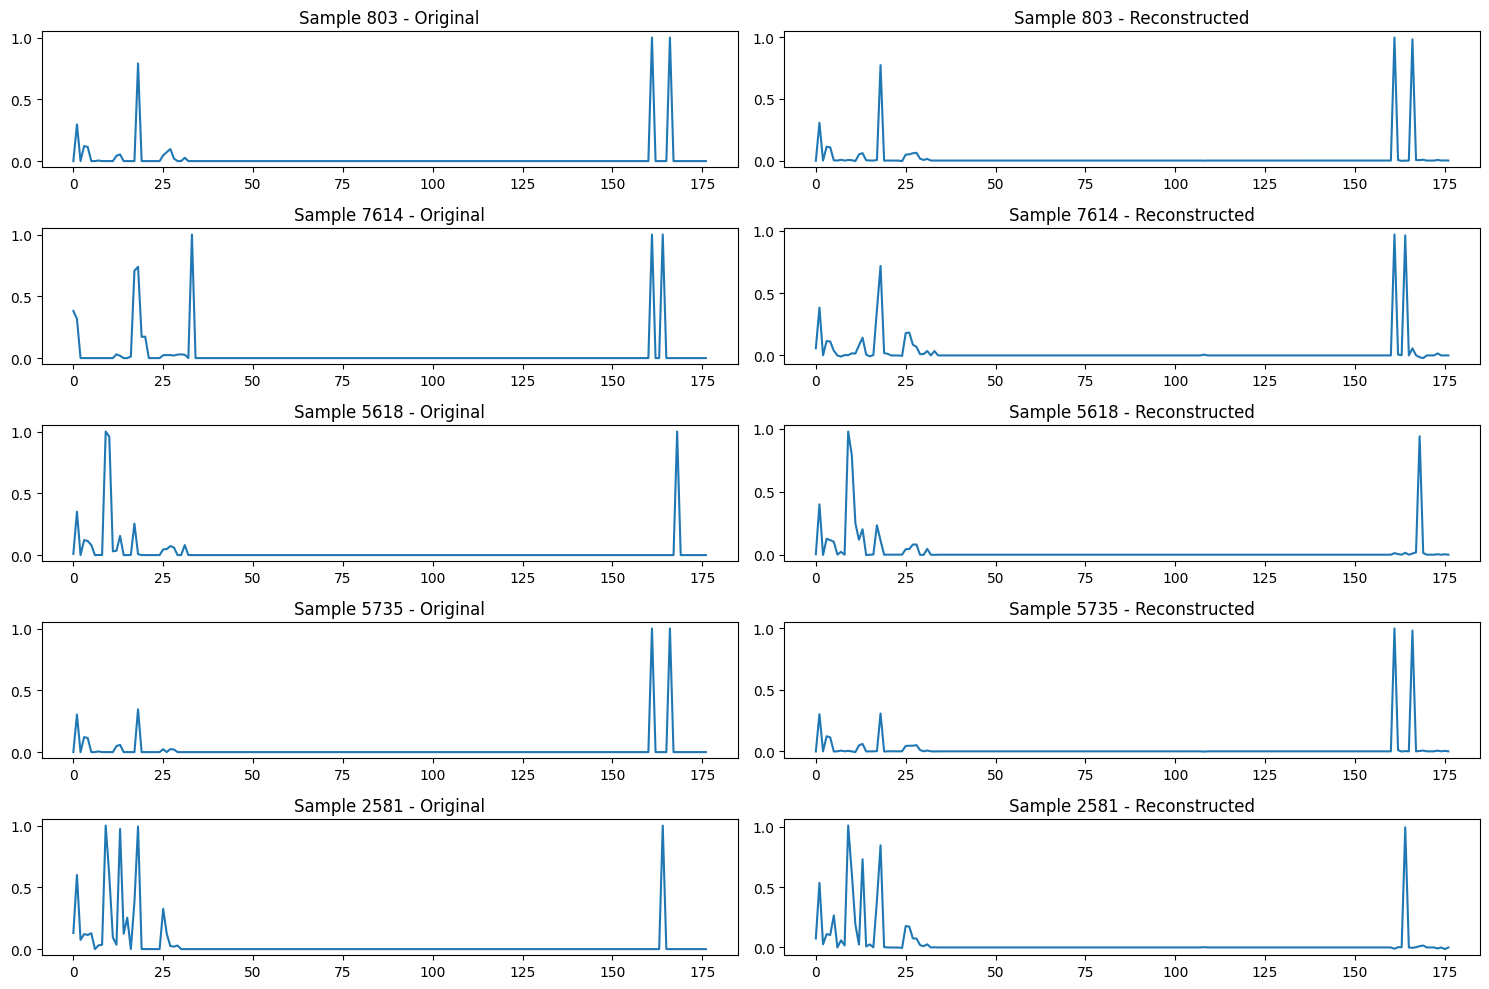


Training Shallow AE with activation: elu
Epoch 1/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1338 - mae: 0.2404

627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.1337 - mae: 0.2402 - val_loss: 0.0023 - val_mae: 0.0127 - learning_rate: 0.0010
Epoch 2/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mae: 0.0248

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0037 - mae: 0.0247 - val_loss: 0.0018 - val_mae: 0.0091 - learning_rate: 0.0010
Epoch 3/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mae: 0.0128

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0026 - mae: 0.0128 - val_loss: 0.0013 - val_mae: 0.0080 - learning_rate: 0.0010
Epoch 4/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mae: 0.0118

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0022 - mae: 0.0118 - val_loss: 0.0011 - val_mae: 0.0074 - learning_rate: 0.0010
Epoch 5/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - mae: 0.0113

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0020 - mae: 0.0113 - val_loss: 9.5694e-04 - val_mae: 0.0069 - learning_rate: 0.0010
Epoch 6/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019 - mae: 0.0110

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0019 - mae: 0.0110 - val_loss: 8.6723e-04 - val_mae: 0.0066 - learning_rate: 0.0010
Epoch 7/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - mae: 0.0108

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0018 - mae: 0.0108 - val_loss: 8.5361e-04 - val_mae: 0.0065 - learning_rate: 0.0010
Epoch 8/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0017 - mae: 0.0106

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0017 - mae: 0.0106 - val_loss: 7.9542e-04 - val_mae: 0.0061 - learning_rate: 0.0010
Epoch 9/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - mae: 0.0105

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0017 - mae: 0.0105 - val_loss: 7.7269e-04 - val_mae: 0.0059 - learning_rate: 0.0010
Epoch 10/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - mae: 0.0103

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0016 - mae: 0.0103 - val_loss: 7.2491e-04 - val_mae: 0.0059 - learning_rate: 0.0010
Epoch 11/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - mae: 0.0102

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0015 - mae: 0.0102 - val_loss: 6.6051e-04 - val_mae: 0.0058 - learning_rate: 0.0010
Epoch 12/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - mae: 0.0102

627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0015 - mae: 0.0102 - val_loss: 6.4244e-04 - val_mae: 0.0058 - learning_rate: 0.0010
Epoch 13/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - mae: 0.0100


Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0014 - mae: 0.0100 - val_loss: 6.2658e-04 - val_mae: 0.0056 - learning_rate: 0.0010
Epoch 14/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - mae: 0.0097

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0014 - mae: 0.0097 - val_loss: 5.7762e-04 - val_mae: 0.0051 - learning_rate: 5.0000e-04
Epoch 15/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - mae: 0.0096

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0013 - mae: 0.0096 - val_loss: 5.3840e-04 - val_mae: 0.0052 - learning_rate: 5.0000e-04
Epoch 16/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - mae: 0.0097

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0013 - mae: 0.0097 - val_loss: 5.3328e-04 - val_mae: 0.0051 - learning_rate: 5.0000e-04
Epoch 17/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - mae: 0.0095


Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0013 - mae: 0.0095 - val_loss: 5.1497e-04 - val_mae: 0.0050 - learning_rate: 5.0000e-04
Epoch 18/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0093

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0093 - val_loss: 4.8543e-04 - val_mae: 0.0047 - learning_rate: 2.5000e-04
Epoch 19/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - mae: 0.0093

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0012 - mae: 0.0093 - val_loss: 4.8013e-04 - val_mae: 0.0048 - learning_rate: 2.5000e-04
Epoch 20/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0093

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0093 - val_loss: 4.6919e-04 - val_mae: 0.0046 - learning_rate: 2.5000e-04
Epoch 21/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0092

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0092 - val_loss: 4.5602e-04 - val_mae: 0.0046 - learning_rate: 2.5000e-04
Epoch 22/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0093

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0093 - val_loss: 4.5317e-04 - val_mae: 0.0046 - learning_rate: 2.5000e-04
Epoch 23/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0092
Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0092 - val_loss: 4.5334e-04 - val_mae: 0.0045 - learning_rate: 2.5000e-04
Epoch 24/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0092

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0092 - val_loss: 4.4171e-04 - val_mae: 0.0045 - learning_rate: 1.2500e-04
Epoch 25/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0091

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0091 - val_loss: 4.3636e-04 - val_mae: 0.0044 - learning_rate: 1.2500e-04
Epoch 26/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0092
Epoch 26: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0012 - mae: 0.0092 - val_loss: 4.3944e-04 - val_mae: 0.0044 - learning_rate: 1.2500e-04
Epoch 27/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0091

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0091 - val_loss: 4.3250e-04 - val_mae: 0.0044 - learning_rate: 6.2500e-05
Epoch 28/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0091

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0091 - val_loss: 4.3111e-04 - val_mae: 0.0043 - learning_rate: 6.2500e-05
Epoch 29/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0090


Epoch 29: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.2905e-04 - val_mae: 0.0043 - learning_rate: 6.2500e-05
Epoch 30/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0090

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.2534e-04 - val_mae: 0.0042 - learning_rate: 3.1250e-05
Epoch 31/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.2632e-04 - val_mae: 0.0043 - learning_rate: 3.1250e-05
Epoch 32/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0090
Epoch 32: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.2680e-04 - val_mae: 0.0043 - learning_rate: 3.1250e-05
Epoch 33/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.2679e-04 - val_mae: 0.0043 - learning_rate: 1.5625e-05
Epoch 34/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0090

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.2517e-04 - val_mae: 0.0043 - learning_rate: 1.5625e-05
Epoch 35/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0090


Epoch 35: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.2470e-04 - val_mae: 0.0042 - learning_rate: 1.5625e-05
Epoch 36/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0090

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.2374e-04 - val_mae: 0.0042 - learning_rate: 7.8125e-06
Epoch 37/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0090

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.2334e-04 - val_mae: 0.0042 - learning_rate: 7.8125e-06
Epoch 38/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0090
Epoch 38: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0011 - mae: 0.0090 - val_loss: 4.2487e-04 - val_mae: 0.0042 - learning_rate: 7.8125e-06
Epoch 39/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - mae: 0.0090

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.2159e-04 - val_mae: 0.0042 - learning_rate: 3.9063e-06
Epoch 40/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.2411e-04 - val_mae: 0.0042 - learning_rate: 3.9063e-06
Epoch 41/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0090
Epoch 41: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.2233e-04 - val_mae: 0.0042 - learning_rate: 3.9063e-06
Epoch 42/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0091 - val_loss: 4.2482e-04 - val_mae: 0.0043 - learning_rate: 1.9531e-06
Epoch 43/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.2250e-04 - val_mae: 0.0042 - learning_rate: 1.9531e-06
Epoch 44/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0090
Epoch 44: ReduceLROnPl

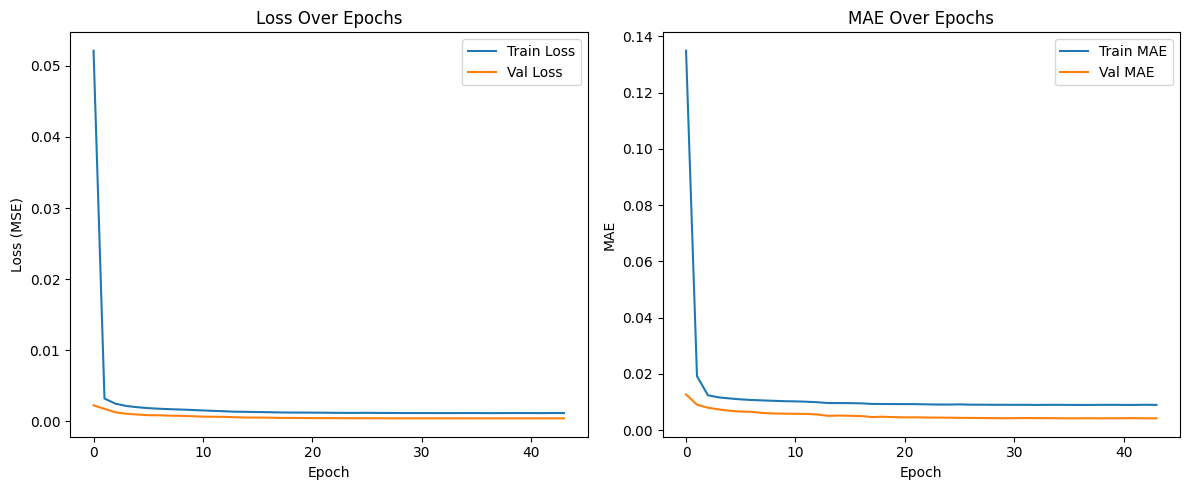

✅ Training plot saved as: training_elu.png

Evaluation for activation: elu
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


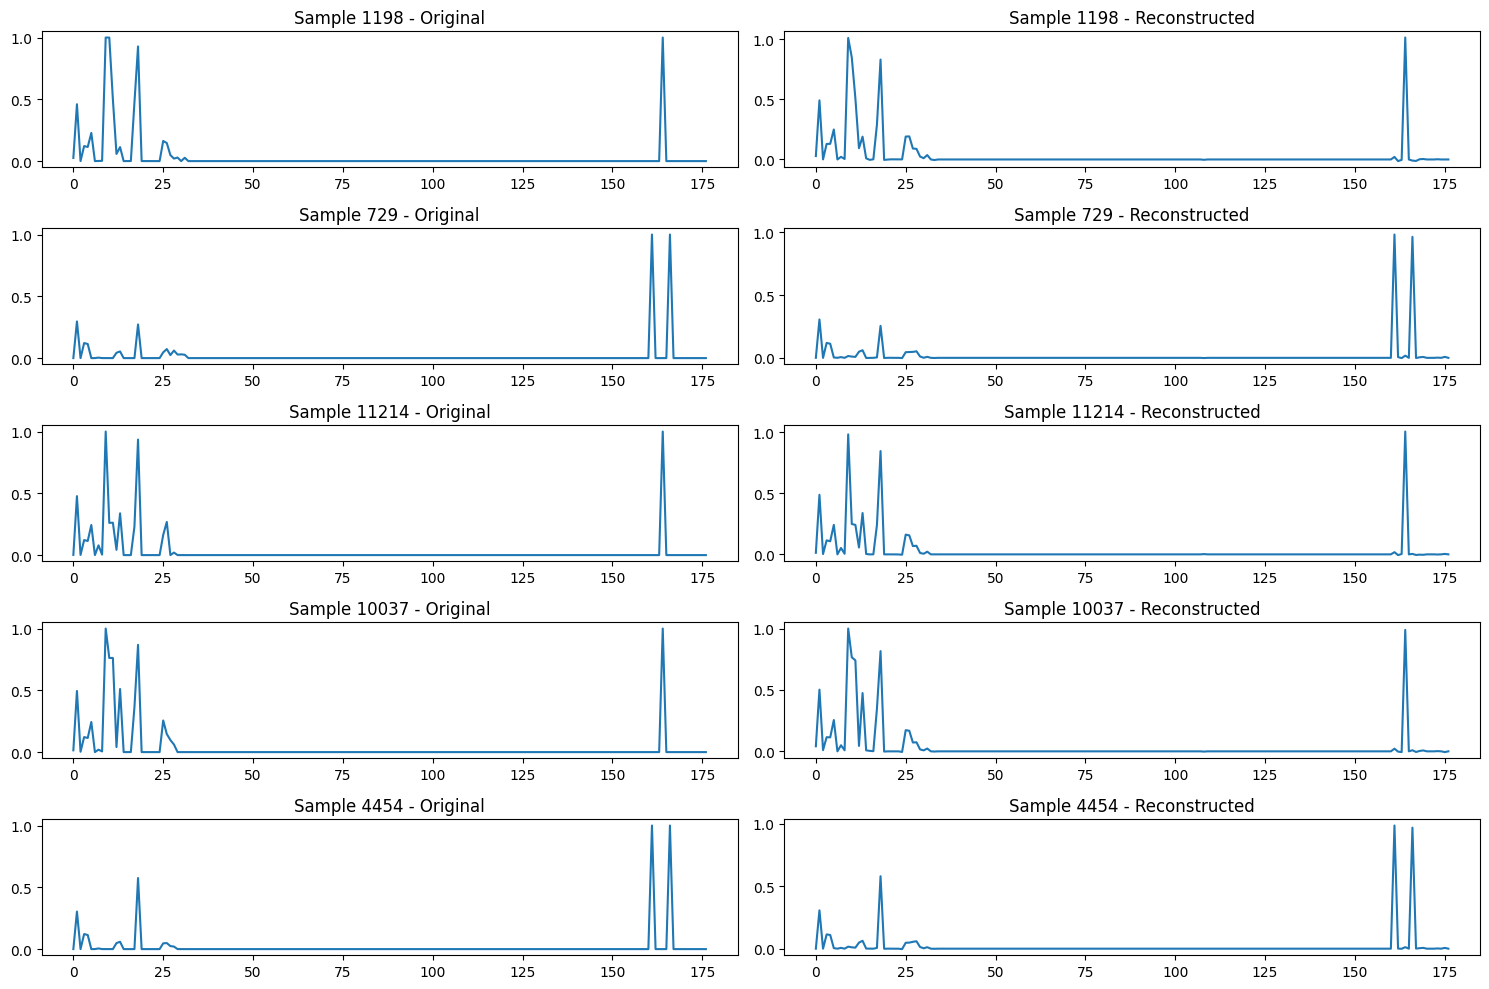


Training Shallow AE with activation: selu
Epoch 1/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1347 - mae: 0.2424

627/627 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.1345 - mae: 0.2421 - val_loss: 0.0024 - val_mae: 0.0145 - learning_rate: 0.0010
Epoch 2/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mae: 0.0260

627/627 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0038 - mae: 0.0260 - val_loss: 0.0017 - val_mae: 0.0094 - learning_rate: 0.0010
Epoch 3/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0026 - mae: 0.0130

627/627 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0026 - mae: 0.0130 - val_loss: 0.0013 - val_mae: 0.0083 - learning_rate: 0.0010
Epoch 4/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mae: 0.0118

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0022 - mae: 0.0118 - val_loss: 0.0011 - val_mae: 0.0076 - learning_rate: 0.0010
Epoch 5/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021 - mae: 0.0115

627/627 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0021 - mae: 0.0115 - val_loss: 9.8115e-04 - val_mae: 0.0068 - learning_rate: 0.0010
Epoch 6/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mae: 0.0113

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0019 - mae: 0.0113 - val_loss: 8.6444e-04 - val_mae: 0.0064 - learning_rate: 0.0010
Epoch 7/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018 - mae: 0.0110

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0018 - mae: 0.0110 - val_loss: 8.4004e-04 - val_mae: 0.0062 - learning_rate: 0.0010
Epoch 8/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - mae: 0.0107

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0017 - mae: 0.0107 - val_loss: 8.1629e-04 - val_mae: 0.0061 - learning_rate: 0.0010
Epoch 9/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - mae: 0.0105


Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0017 - mae: 0.0105 - val_loss: 7.6799e-04 - val_mae: 0.0059 - learning_rate: 0.0010
Epoch 10/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 - mae: 0.0101

627/627 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0016 - mae: 0.0101 - val_loss: 7.2030e-04 - val_mae: 0.0058 - learning_rate: 5.0000e-04
Epoch 11/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - mae: 0.0101

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0016 - mae: 0.0101 - val_loss: 6.8316e-04 - val_mae: 0.0056 - learning_rate: 5.0000e-04
Epoch 12/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - mae: 0.0101

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0015 - mae: 0.0101 - val_loss: 6.2536e-04 - val_mae: 0.0054 - learning_rate: 5.0000e-04
Epoch 13/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - mae: 0.0099

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0014 - mae: 0.0099 - val_loss: 5.8748e-04 - val_mae: 0.0055 - learning_rate: 5.0000e-04
Epoch 14/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - mae: 0.0100

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0014 - mae: 0.0100 - val_loss: 5.5305e-04 - val_mae: 0.0054 - learning_rate: 5.0000e-04
Epoch 15/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - mae: 0.0098

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0014 - mae: 0.0098 - val_loss: 5.0741e-04 - val_mae: 0.0050 - learning_rate: 5.0000e-04
Epoch 16/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - mae: 0.0097

627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0013 - mae: 0.0097 - val_loss: 4.8199e-04 - val_mae: 0.0050 - learning_rate: 5.0000e-04
Epoch 17/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - mae: 0.0096

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0013 - mae: 0.0096 - val_loss: 4.7076e-04 - val_mae: 0.0046 - learning_rate: 5.0000e-04
Epoch 18/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - mae: 0.0095

627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0013 - mae: 0.0095 - val_loss: 4.5228e-04 - val_mae: 0.0048 - learning_rate: 5.0000e-04
Epoch 19/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0093


Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - mae: 0.0093 - val_loss: 4.2486e-04 - val_mae: 0.0047 - learning_rate: 5.0000e-04
Epoch 20/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0092

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0092 - val_loss: 3.9934e-04 - val_mae: 0.0041 - learning_rate: 2.5000e-04
Epoch 21/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.0077e-04 - val_mae: 0.0042 - learning_rate: 2.5000e-04
Epoch 22/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0091


Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - mae: 0.0091 - val_loss: 3.9846e-04 - val_mae: 0.0043 - learning_rate: 2.5000e-04
Epoch 23/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0090

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 3.8425e-04 - val_mae: 0.0040 - learning_rate: 1.2500e-04
Epoch 24/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 3.8757e-04 - val_mae: 0.0041 - learning_rate: 1.2500e-04
Epoch 25/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0090

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 3.7871e-04 - val_mae: 0.0040 - learning_rate: 1.2500e-04
Epoch 26/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 3.8043e-04 - val_mae: 0.0041 - learning_rate: 1.2500e-04
Epoch 27/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 3.7458e-04 - val_mae: 0.0041 - learning_rate: 1.2500e-04
Epoch 28/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0090
Epoch 28: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 3.7483e-04 - val_mae: 0.0040 - learning_rate: 1.2500e-04
Epoch 29/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 3.6790e-04 - val_mae: 0.0039 - learning_rate: 6.2500e-05
Epoch 30/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 3.6986e-04 - val_mae: 0.0039 - learning_rate: 6.2500e-05
Epoch 31/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0089


Epoch 31: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 3.6680e-04 - val_mae: 0.0039 - learning_rate: 6.2500e-05
Epoch 32/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 3.6784e-04 - val_mae: 0.0038 - learning_rate: 3.1250e-05
Epoch 33/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mae: 0.0088

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 3.6598e-04 - val_mae: 0.0038 - learning_rate: 3.1250e-05
Epoch 34/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0088
Epoch 34: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 3.6805e-04 - val_mae: 0.0039 - learning_rate: 3.1250e-05
Epoch 35/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0088

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 3.6575e-04 - val_mae: 0.0038 - learning_rate: 1.5625e-05
Epoch 36/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mae: 0.0088

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 3.6480e-04 - val_mae: 0.0038 - learning_rate: 1.5625e-05
Epoch 37/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0088


Epoch 37: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 3.6292e-04 - val_mae: 0.0038 - learning_rate: 1.5625e-05
Epoch 38/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0011 - mae: 0.0087 - val_loss: 3.6469e-04 - val_mae: 0.0038 - learning_rate: 7.8125e-06
Epoch 39/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 3.6406e-04 - val_mae: 0.0038 - learning_rate: 7.8125e-06
Epoch 40/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0088


Epoch 40: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 3.6112e-04 - val_mae: 0.0038 - learning_rate: 7.8125e-06
Epoch 41/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mae: 0.0088

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 3.6025e-04 - val_mae: 0.0038 - learning_rate: 3.9063e-06
Epoch 42/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 3.6345e-04 - val_mae: 0.0038 - learning_rate: 3.9063e-06
Epoch 43/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mae: 0.0088
Epoch 43: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 3.6263e-04 - val_mae: 0.0038 - learning_rate: 3.9063e-06
Epoch 44/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 3.6490e-04 - val_mae: 0.0038 - learning_rate: 1.9531e-06
Epoch 45/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 3.6181e-04 - val_mae: 0.0038 - learning_rate: 1.9531e-06
Epoch 46/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mae: 0.0087
Epoch 46: ReduceLROnPl

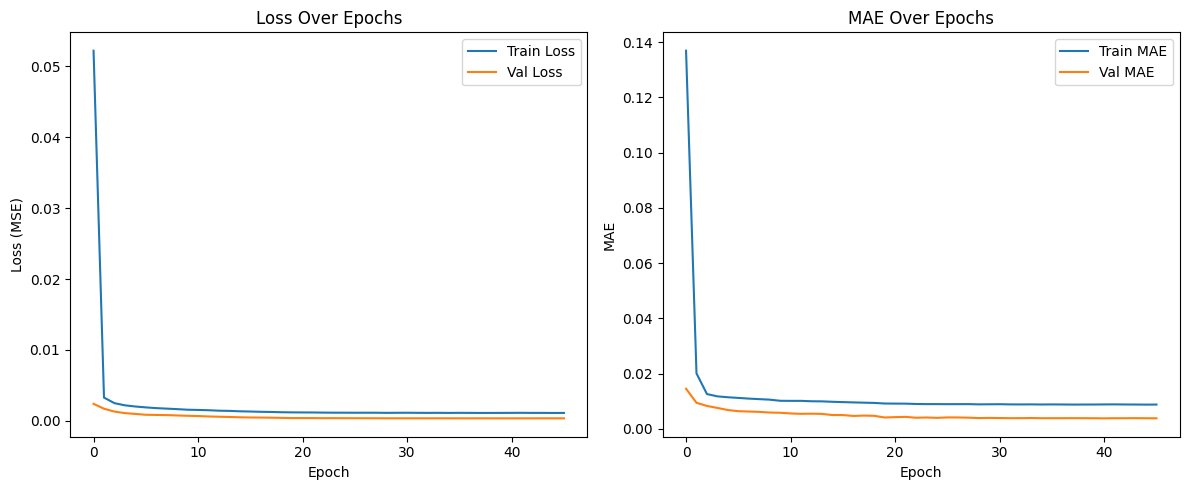

✅ Training plot saved as: training_selu.png

Evaluation for activation: selu
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


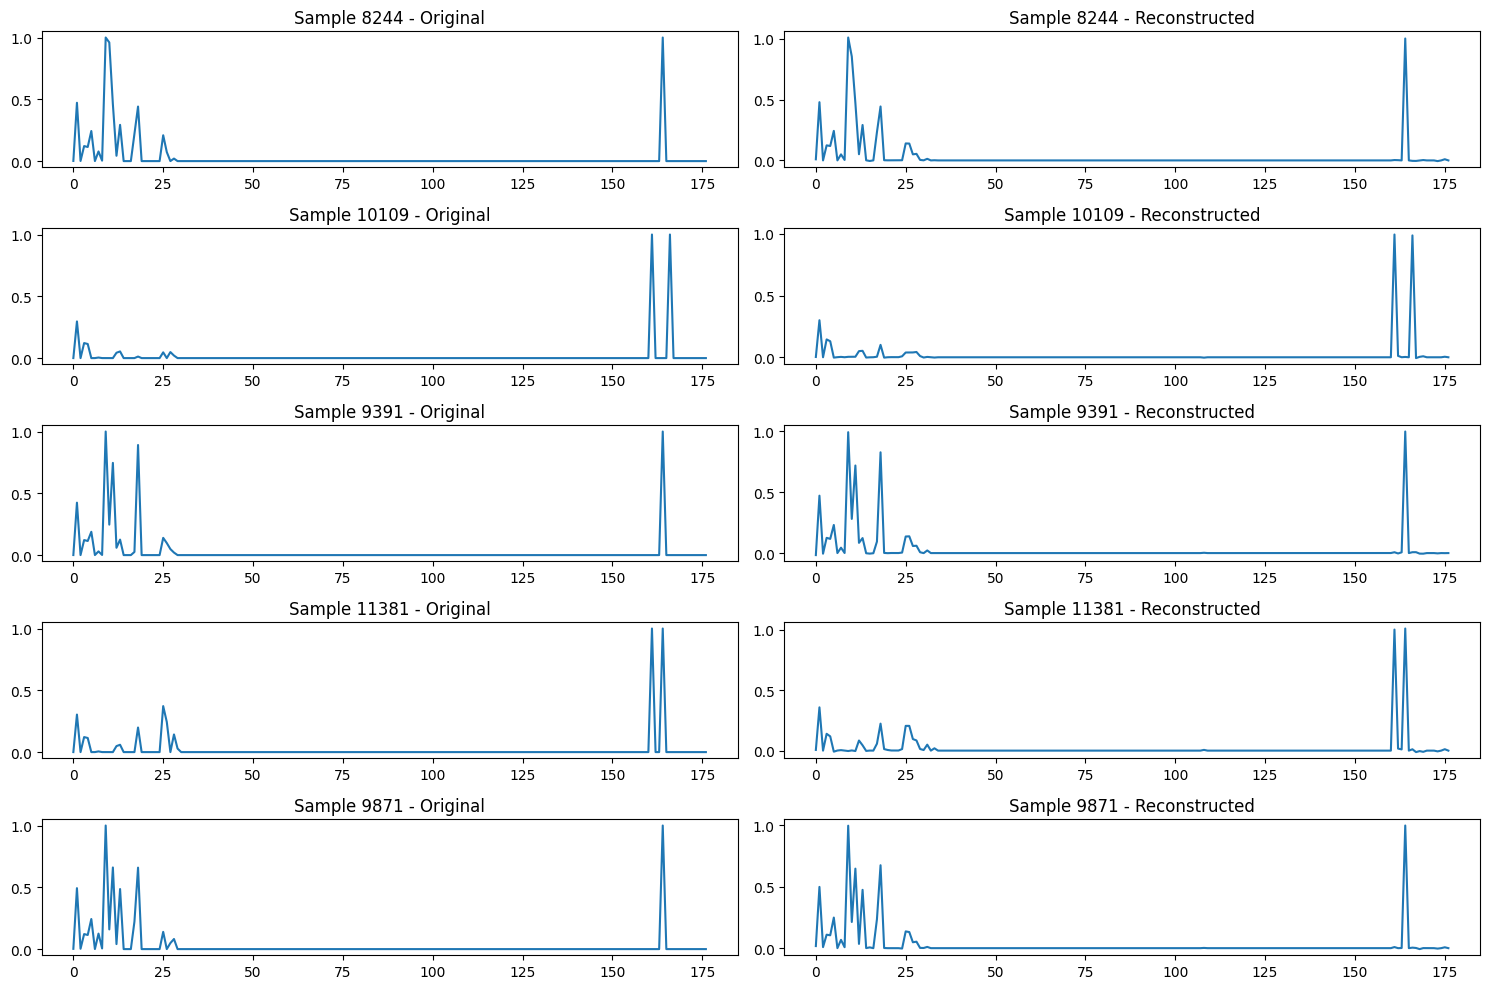


Training Shallow AE with activation: leaky_relu


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1540 - mae: 0.2502

627/627 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.1533 - mae: 0.2492 - val_loss: 0.0024 - val_mae: 0.0135 - learning_rate: 0.0010
Epoch 2/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mae: 0.0243

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0038 - mae: 0.0242 - val_loss: 0.0019 - val_mae: 0.0094 - learning_rate: 0.0010
Epoch 3/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mae: 0.0130

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0028 - mae: 0.0130 - val_loss: 0.0016 - val_mae: 0.0083 - learning_rate: 0.0010
Epoch 4/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mae: 0.0121

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0025 - mae: 0.0121 - val_loss: 0.0014 - val_mae: 0.0079 - learning_rate: 0.0010
Epoch 5/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mae: 0.0117

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0023 - mae: 0.0117 - val_loss: 0.0012 - val_mae: 0.0076 - learning_rate: 0.0010
Epoch 6/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mae: 0.0114

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0021 - mae: 0.0114 - val_loss: 0.0011 - val_mae: 0.0073 - learning_rate: 0.0010
Epoch 7/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mae: 0.0111

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0020 - mae: 0.0111 - val_loss: 9.9478e-04 - val_mae: 0.0068 - learning_rate: 0.0010
Epoch 8/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mae: 0.0109

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0019 - mae: 0.0109 - val_loss: 9.0211e-04 - val_mae: 0.0064 - learning_rate: 0.0010
Epoch 9/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mae: 0.0107

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0018 - mae: 0.0107 - val_loss: 8.3205e-04 - val_mae: 0.0065 - learning_rate: 0.0010
Epoch 10/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - mae: 0.0107

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0017 - mae: 0.0107 - val_loss: 7.6398e-04 - val_mae: 0.0063 - learning_rate: 0.0010
Epoch 11/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - mae: 0.0105

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0016 - mae: 0.0105 - val_loss: 6.8905e-04 - val_mae: 0.0059 - learning_rate: 0.0010
Epoch 12/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - mae: 0.0103

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0015 - mae: 0.0103 - val_loss: 6.4068e-04 - val_mae: 0.0059 - learning_rate: 0.0010
Epoch 13/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - mae: 0.0101

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0015 - mae: 0.0101 - val_loss: 6.1846e-04 - val_mae: 0.0059 - learning_rate: 0.0010
Epoch 14/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014 - mae: 0.0099

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0014 - mae: 0.0099 - val_loss: 5.7209e-04 - val_mae: 0.0055 - learning_rate: 0.0010
Epoch 15/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0014 - mae: 0.0099 - val_loss: 5.7342e-04 - val_mae: 0.0057 - learning_rate: 0.0010
Epoch 16/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - mae: 0.0096

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0013 - mae: 0.0096 - val_loss: 5.6286e-04 - val_mae: 0.0058 - learning_rate: 0.0010
Epoch 17/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - mae: 0.0098
Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0013 - mae: 0.0098 - val_loss: 5.7315e-04 - val_mae: 0.0059 - learning_rate: 0.0010
Epoch 18/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - mae: 0.0093

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0013 - mae: 0.0093 - val_loss: 4.9761e-04 - val_mae: 0.0049 - learning_rate: 5.0000e-04
Epoch 19/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0093 - val_loss: 4.9764e-04 - val_mae: 0.0048 - learning_rate: 5.0000e-04
Epoch 20/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0093


Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0093 - val_loss: 4.9470e-04 - val_mae: 0.0048 - learning_rate: 5.0000e-04
Epoch 21/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - mae: 0.0091

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0012 - mae: 0.0091 - val_loss: 4.6469e-04 - val_mae: 0.0046 - learning_rate: 2.5000e-04
Epoch 22/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0090

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.5823e-04 - val_mae: 0.0045 - learning_rate: 2.5000e-04
Epoch 23/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0090

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.5035e-04 - val_mae: 0.0047 - learning_rate: 2.5000e-04
Epoch 24/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0090


Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 4.4362e-04 - val_mae: 0.0045 - learning_rate: 2.5000e-04
Epoch 25/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.3491e-04 - val_mae: 0.0044 - learning_rate: 1.2500e-04
Epoch 26/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.3754e-04 - val_mae: 0.0046 - learning_rate: 1.2500e-04
Epoch 27/100
617/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0089


Epoch 27: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.3331e-04 - val_mae: 0.0046 - learning_rate: 1.2500e-04
Epoch 28/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.2412e-04 - val_mae: 0.0043 - learning_rate: 6.2500e-05
Epoch 29/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.2511e-04 - val_mae: 0.0044 - learning_rate: 6.2500e-05
Epoch 30/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0088


Epoch 30: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.1793e-04 - val_mae: 0.0043 - learning_rate: 6.2500e-05
Epoch 31/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.1824e-04 - val_mae: 0.0043 - learning_rate: 3.1250e-05
Epoch 32/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.1870e-04 - val_mae: 0.0043 - learning_rate: 3.1250e-05
Epoch 33/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - mae: 0.0089


Epoch 33: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.1462e-04 - val_mae: 0.0043 - learning_rate: 3.1250e-05
Epoch 34/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.1207e-04 - val_mae: 0.0043 - learning_rate: 1.5625e-05
Epoch 35/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.1487e-04 - val_mae: 0.0043 - learning_rate: 1.5625e-05
Epoch 36/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0089
Epoch 36: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.1394e-04 - val_mae: 0.0043 - learning_rate: 1.5625e-05
Epoch 37/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.1191e-04 - val_mae: 0.0042 - learning_rate: 7.8125e-06
Epoch 38/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 4.1453e-04 - val_mae: 0.0043 - learning_rate: 7.8125e-06
Epoch 39/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0089
Epoch 39: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.1254e-04 - val_mae: 0.0043 - learning_rate: 7.8125e-06
Epoch 40/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.1384e-04 - val_mae: 0.0043 - learning_rate: 3.9063e-06
Epoch 41/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.1398e-04 - val_mae: 0.0043 - learning_rate: 3.9063e-06
Epoch 42/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0089


Epoch 42: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 4.1028e-04 - val_mae: 0.0042 - learning_rate: 3.9063e-06
Epoch 43/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0088 - val_loss: 4.1223e-04 - val_mae: 0.0043 - learning_rate: 1.9531e-06
Epoch 44/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.1607e-04 - val_mae: 0.0043 - learning_rate: 1.9531e-06
Epoch 45/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0088
Epoch 45: ReduceLROnPlateau reducing learning rate to 1e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.1191e-04 - val_mae: 0.0042 - learning_rate: 1.9531e-06
Epoch 46/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0088 - val_loss: 4.1302e-04 - val_mae: 0.0042 - learning_rate: 1.0000e-06
Epoch 47/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 5

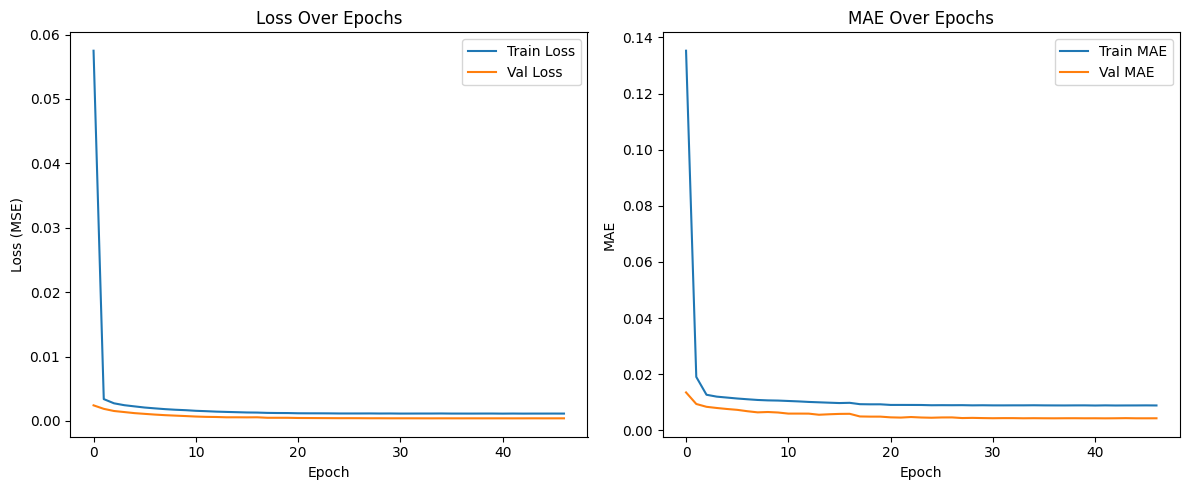

✅ Training plot saved as: training_leaky_relu.png

Evaluation for activation: leaky_relu
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


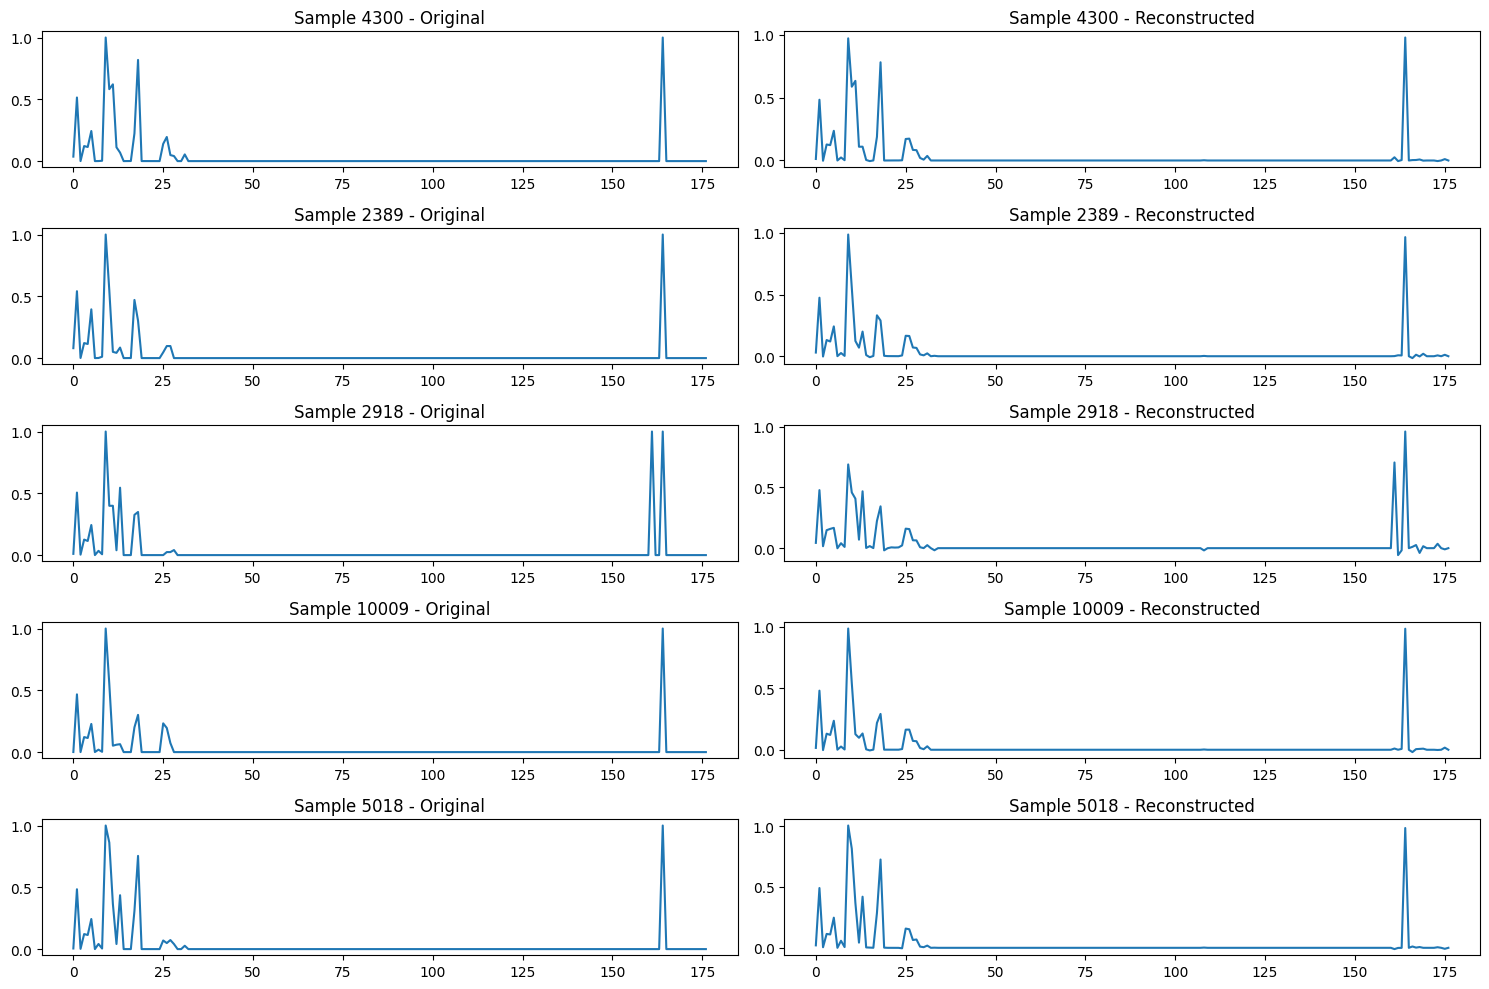

In [28]:
# 4. Shallow AE with configurable activation
activations = ["relu", "tanh", "elu", 'selu', 'leaky_relu']
results = {}

for act in activations:
    print(f"\nTraining Shallow AE with activation: {act}")
    ae_model = build_ae(input_dim=X_train.shape[1], encoding_dim=16, activation=act)
    hist, model = train_autoencoder(ae_model, X_train, X_val,
                                     save_path=f'best_ae_{act}.h5')

    plot_training_history(hist, save_path=f'training_{act}.png')

    print(f"\nEvaluation for activation: {act}")
    re = compute_reconstruction_error(model, X_test)
    results[act] = evaluate_anomaly_detection(re, y_test)
    visualize_reconstruction(model, X_test.to_numpy())

In [29]:
results

{'relu': {'threshold': np.float64(0.003910236012686867),
  'precision': np.float64(0.5818181818181818),
  'recall': np.float64(0.9965397923875432),
  'f1': np.float64(0.7346938775044725),
  'roc_auc': np.float64(0.9905784129118473),
  'confusion_matrix': {'TP': np.int64(288),
   'FP': np.int64(207),
   'TN': np.int64(12320),
   'FN': np.int64(1)}},
 'tanh': {'threshold': np.float64(0.004389350721477511),
  'precision': np.float64(0.6016771488469602),
  'recall': np.float64(0.9930795847750865),
  'f1': np.float64(0.7493472584386516),
  'roc_auc': np.float64(0.9908485560462756),
  'confusion_matrix': {'TP': np.int64(287),
   'FP': np.int64(190),
   'TN': np.int64(12337),
   'FN': np.int64(2)}},
 'elu': {'threshold': np.float64(0.0031282272547955613),
  'precision': np.float64(0.5017857142857143),
  'recall': np.float64(0.972318339100346),
  'f1': np.float64(0.6619552414156362),
  'roc_auc': np.float64(0.9876419183698159),
  'confusion_matrix': {'TP': np.int64(281),
   'FP': np.int64(279)